In [1]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re
import random
import sys

In [2]:
import nltk
import gensim.models.word2vec as w2v
import gensim
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

In [3]:
model = gensim.models.Word2Vec.load('hi.bin')

In [4]:
print(model)

Word2Vec(vocab=30393, size=300, alpha=0.025)


In [5]:
# summarize vocabulary
words = list(model.wv.vocab)

In [6]:
print(words[:100])

['विनिवेश', 'लवण', 'देवीसिंह', 'घाटा', 'हस्तचालित', 'डीवीडी', 'उठायी', 'श्रीकाकुलम', 'हिग्स', 'घटनाक्रम', 'लालिमा', 'लिथुआनिया', 'माथे', 'टर्न', 'इत्र', 'बांग्ला', 'अभिशाप', 'फ़्यूचर', 'हैरिसन', 'इकसिंगे', 'पेंस', 'यौवन', 'पांड्यों', 'माथा', 'अंबर', 'जनेऊ', 'अंबा', 'पेंट', 'पेंच', 'फ़िल्मांकन', 'देवियाँ', 'फेनी', 'नाटिका', 'कोलबर्ग', 'तत्त्वों', 'घाटी', 'घाटे', 'सेनानायक', 'इंडिका', 'बुल्गारिया', 'कमर', 'निषेधाज्ञा', 'अमरीका', 'प्रामाणिकता', 'ब्रह्मांडीय', 'कमा', 'डिजाइनर', 'अमरीकन', 'सह-निर्माता', 'शताब्दियों', 'वस्तुनिष्ठ', 'गाव', 'मण्डली', 'निवृत्ति', 'स्टैण्डर्ड', 'इच्छित', 'मंदाकिनी', 'प्रोफेसरों', 'रसायनशास्त्री', 'पियानो', 'व्यास', 'जर्मनिक', 'कहा-', 'कमी', 'फ़्रान्स', 'फ़ौज', 'रिक्ति', 'टेस्टिंग', 'अमरीकी', 'व्याध', 'मनुस्मृति', 'श्रावस्ती', 'सौन्दर्य', 'बारात', 'दंडों', 'बुख़ारा', 'अरमानी', 'दाम्पत्य', 'क्रिकेट', 'उडीसा', 'भागीदारी', 'बटेर', 'मीट्रिक', 'पद्धतियों', 'परेशानी', 'सट्टा', 'कृष्णराज', 'सिटिज़', 'एनजाइना', 'टीकाकार', 'ब्रह्मविद्या', 'लाओस', 'वरिष्ठता', 'वाणी', 'निखा

In [7]:
model.wv.most_similar('नाटिका')

[('भरतनाट्यम', 0.7278464436531067),
 ('ध्रुपद', 0.7099226117134094),
 ('चैती', 0.6973972916603088),
 ('ठुमरी', 0.6965022683143616),
 ('ओडिसी', 0.6958686709403992),
 ('संगीतमय', 0.6877726912498474),
 ('मूकाभिनय', 0.6867836117744446),
 ('कथक', 0.6865541338920593),
 ('गरबा', 0.6784392595291138),
 ('गीतगोविन्द', 0.6764531135559082)]

In [8]:
model.wv.most_similar('सौन्दर्य')

[('सौंदर्य', 0.8637158870697021),
 ('कलात्मकता', 0.7224439382553101),
 ('अद्भुत', 0.6824588775634766),
 ('श्रृंगार', 0.6814439296722412),
 ('नैसर्गिक', 0.6725433468818665),
 ('अनुपम', 0.6696207523345947),
 ('माधुर्य', 0.6662158370018005),
 ('शिल्प', 0.6526128649711609),
 ('वैभव', 0.6403029561042786),
 ('कलात्मक', 0.6374174952507019)]

In [9]:
result = model.wv.most_similar(positive=['ध्यानचंद','क्रिकेट'],negative=['हॉकी'] ,topn=10)
print(result)

[('सहवाग', 0.6555640697479248), ('धोनी', 0.6221283078193665), ('मुरलीधरन', 0.5859558582305908), ('गावस्कर', 0.5848496556282043), ('वीरेंद्र', 0.5783268809318542), ('सचिन', 0.5725929737091064), ('विकेटकीपर', 0.5701088905334473), ('उन्नीकृष्णन', 0.5640284419059753), ('कुंबले', 0.5637799501419067), ('तेंदुलकर', 0.5608426332473755)]


In [10]:
model.wv.most_similar('उडीसा')

[('मिथिलांचल', 0.7737730741500854),
 ('रामेश्वरम', 0.7221984267234802),
 ('नन्दा', 0.7005703449249268),
 ('त्रिपुरा', 0.7004174590110779),
 ('शृंगेरी', 0.6957623362541199),
 ('कौशांबी', 0.6934546828269958),
 ('षष्ठी', 0.6921010613441467),
 ('गणगौर', 0.6886007785797119),
 ('होशियारपुर', 0.687568187713623),
 ('संबलपुर', 0.686922013759613)]

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

hindi_font = FontProperties(fname = 'Nirmala.ttf')

In [12]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300))
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)
    
    #print(word_labels)
    #print(wrd_vector.shape)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        #print(label)
        
        plt.annotate(label, xy=(x, y),fontproperties=hindi_font)
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


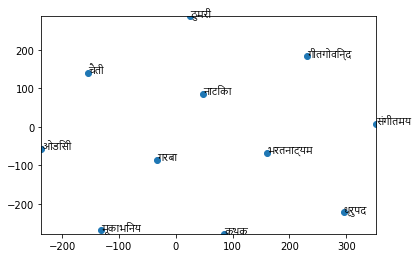

In [13]:
display_closestwords_tsnescatterplot(model, 'नाटिका')